2022-06-28 <br/>
UK Gender pay gap <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-06-28

Advanced Bar plot - Completed 

In [3]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default="jupyterlab"
import os

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-28/UK%20Gender%20Pay%20Gap%20Data%20-%202021%20to%202022.csv')

In [8]:
df_sized = df[df.EmployerSize != "Not Provided"]

In [10]:
df_sized.columns

Index(['EmployerName', 'EmployerId', 'Address', 'PostCode', 'CompanyNumber',
       'SicCodes', 'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

In [9]:
df_sized.head()

,EmployerName,EmployerId,Address,PostCode,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,19070,"Aberystwyth University, Penglais, Ceredigion, ...",SY23 3FL,RC000641,NaN,8.5,3.7,NaN,NaN,...,59.1,55.6,44.4,https://www.aber.ac.uk/en/equality/equality-re...,Dylan Jones (Diversity and Inclusion Manager),1000 to 4999,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,False,2022/04/05 00:00:00,2022/03/31 13:09:40
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED",16879,"19 Smith's Place, Leith Walk, Edinburgh, EH6 8NU",EH6 8NU,SC016876,47730,0.6,-4.4,14.1,-2.0,...,95.1,20.5,79.5,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,2022/04/05 00:00:00,2022/03/25 09:16:08
2,1509 GROUP,15320,"Royal Grammar School, High Street, Guildford, ...",GU1 3BB,04104101,"85200,\n85310",18.0,16.0,NaN,NaN,...,50.0,71.0,29.0,https://www.rgsg.co.uk,Ann Mortimer (Payroll Manager),Less than 250,1509 GROUP,False,2022/04/05 00:00:00,2022/02/02 11:06:02
3,1LIFE MANAGEMENT SOLUTIONS LIMITED,687,"Ldh House St Ives Business Park, Parsons Green...",PE27 4AA,02566586,"93110,\n93130,\n93290",6.1,-35.3,55.5,-100.0,...,65.2,47.8,52.2,https://www.1life.co.uk/corporate-information/,Ann Chesher (Head of Employee Services),Less than 250,1LIFE MANAGEMENT SOLUTIONS LIMITED,False,2022/04/05 00:00:00,2022/02/01 12:19:55
4,1ST HOME CARE LTD.,17484,"Real Life Options, 35 East Port, Dunfermline, ...",KY12 7LG,SC272838,"86900,\n88100",-3.0,0.0,NaN,NaN,...,91.0,8.0,92.0,NaN,David Sargent (Group Chief Executive Officer),Less than 250,1ST HOME CARE LTD.,False,2022/04/05 00:00:00,2022/02/08 14:48:58


In [23]:
df_reduced = df_sized[(df_sized.DiffMedianHourlyPercent.between(-100, 100)) & (df_sized.DiffMedianBonusPercent.between(-100, 100))]

In [16]:
df_reduced1 = df_sized.groupby(['EmployerSize'])[['DiffMedianHourlyPercent','DiffMedianBonusPercent']].median().reset_index()

In [17]:
df_reduced1

,EmployerSize,DiffMedianHourlyPercent,DiffMedianBonusPercent
0,1000 to 4999,9.00,14.85
1,"20,000 or more",7.15,23.80
2,250 to 499,10.50,17.40
3,500 to 999,9.50,15.90
4,"5000 to 19,999",9.20,19.30
5,Less than 250,9.60,20.00


In [29]:
df_reduced.EmployerSize.unique()

array(['250 to 499', 'Less than 250', '5000 to 19,999', '1000 to 4999',
       '500 to 999', '20,000 or more'], dtype=object)

In [50]:

fig = go.Figure()
fig.add_trace(go.Box(
    x=df_reduced.DiffMedianHourlyPercent,
    y=df_reduced.EmployerSize,
    name='Median Hourly Percent',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    x=df_reduced.DiffMedianBonusPercent,
    y=df_reduced.EmployerSize,
    name='Median Bonus Percent',
    marker_color='#FF851B'
))



fig.update_layout(
    xaxis=dict(title='% Pay Difference', zeroline=False),
    yaxis=dict(categoryorder='array', categoryarray=['Less than 250', '250 to 499', '500 to 999', '1000 to 4999', '5000 to 19,999','20,000 or more']),
    boxmode='group',
    autosize=False,
    width=1200,
    height=900,
    title = "Pay Gap disparity between Men and Women in the UK for 2021 - 2022<br><sup>Positive values highlight larger bonuses for men </sup>"
)

fig.add_vline(x=0, line_width=1.5, line_dash="dash", line_color="black")

fig.update_traces(orientation='h') # horizontal box plots
fig.show()

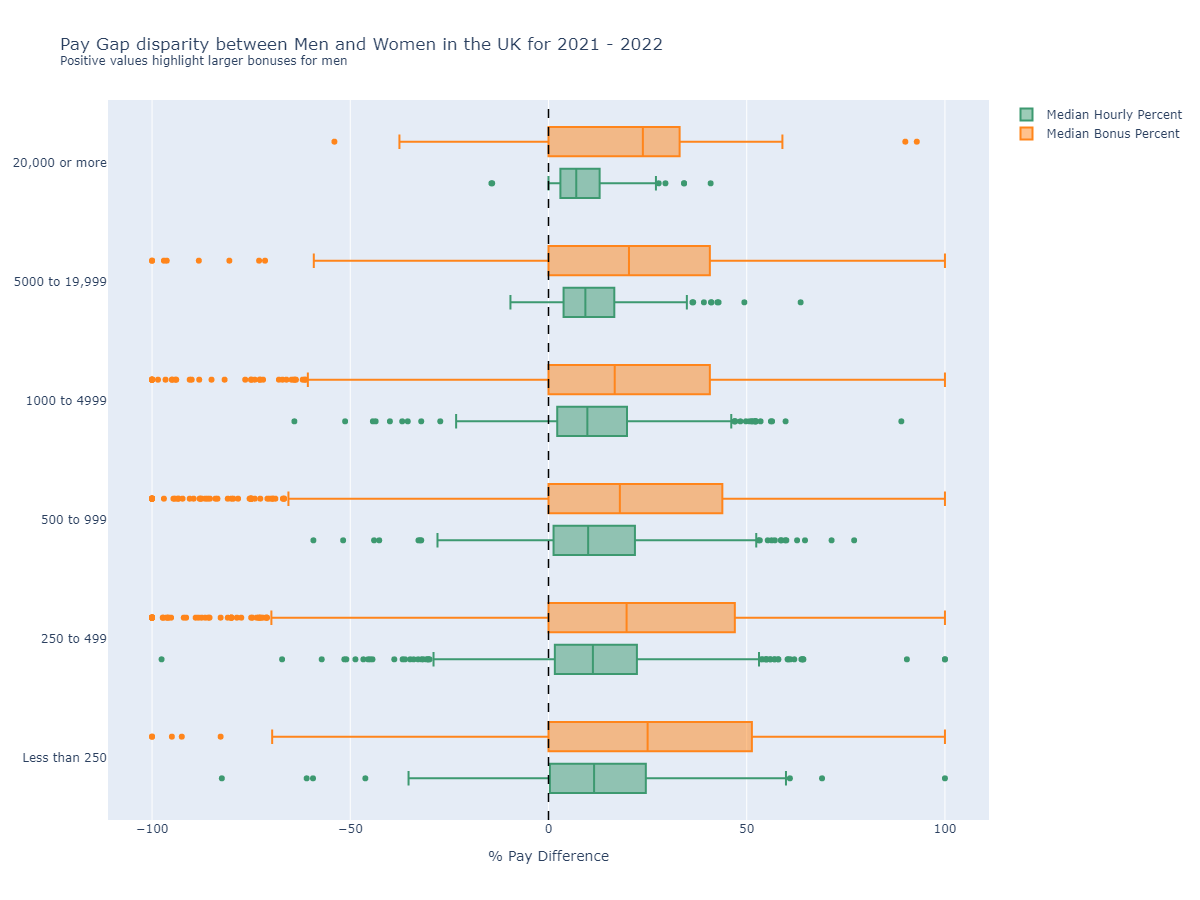

In [51]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)